FASHION MNIST
Label	Description

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [1]:
# IMPORTING THE PACKAGES/DEPENDENCIES
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt


In [2]:
#loading the data
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
print(x_test.shape)
print(y_train.shape)

(10000, 28, 28)
(60000,)


In [5]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  33,  96, 175, 156,  64,
         14,  54, 137, 204, 194, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  73, 186, 177, 183, 175, 188, 232,
        255, 223, 219, 194, 179, 186, 213, 146,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  35, 163, 140, 150, 152, 150, 146, 175,
        175, 173, 171, 156, 152, 148, 129, 156, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 150, 142, 140, 152, 160, 156, 146, 142,
        127, 135, 133, 140, 140, 137, 133, 125, 169,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  54, 167, 146, 129, 142, 137, 137, 131,
        148, 148, 133, 131, 131, 131, 125, 140, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 110, 188, 133, 146, 152, 133, 125,
        127, 119, 129, 133, 119, 140, 131, 150,  14,   0,   0,   0,   0,
          0,   0],
       [  

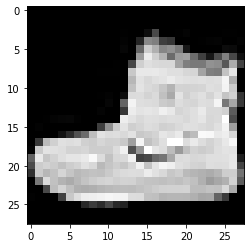

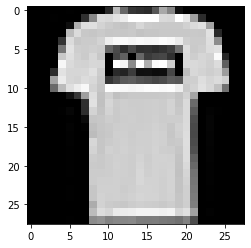

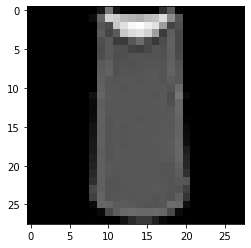

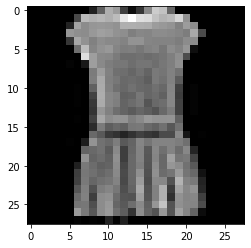

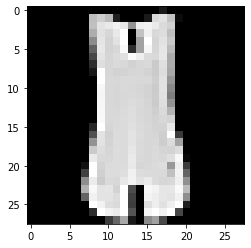

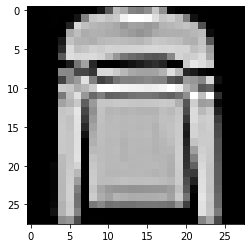

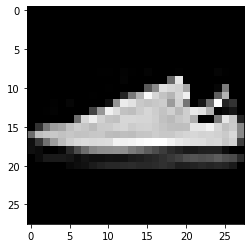

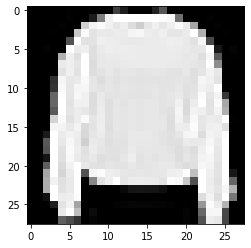

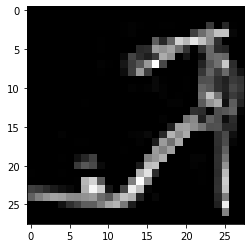

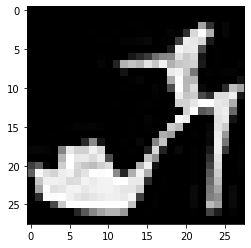

In [6]:
# visualize the image
for i in range(10):
  plt.imshow(x_train[i],cmap = 'gray')
  plt.show()

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
#normalizing our dataset images from values of pixels between 0-255 to 0-1
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train[3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.12941176, 0.37647059,
        0.68627451, 0.61176471, 0.25098039, 0.05490196, 0.21176471,
        0.5372549 , 0.8       , 0.76078431, 0.4       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.28627451, 0.72941176, 0.69411765, 0.71764706,
        0.68627451, 0.7372549 , 0.90980392, 1.        , 0.8745098 ,
        0.85882353, 0.76078431, 0.70196078, 0.72941176, 0.83529412,
        0.57254902, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.1372549 , 0.63921569, 0.54901961, 0.58823529, 0.59607843,
        0.58823529, 0.57254902, 0.68627451, 0.68627451, 0.67843137,
        0.67058824, 0.6117

In [11]:
#Encoding the labels using np_utils
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [12]:
#reshaping our images from 28,28 to (28,28,1) where 1 represents the channel or the depth
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
y_train[3]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
#Building our Convolution neural network
model = Sequential()

In [16]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (28,28,1)))  #building a convolution layer by giving the input no.of kernels and kernel size and the input shape
model.add(MaxPooling2D(2,2)) # Adding the maxpooling layer to extract the features as well as to reduce the size of the image
model.add(Conv2D(16,(2,2),activation='relu')) # adding the 2nd Conv layer
model.add(MaxPooling2D(2,2))
model.add(Flatten())  #flatten will reshape our n dim array to 1d vector. The input require for the fully connected neural network
model.add(Dense(32,activation='relu')) #fully connected layer
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax')) #output layer

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2064      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                18464     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1

In [18]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [19]:
history = model.fit(x_train,y_train,batch_size = 200, epochs = 10)

Epoch 1/10
300/300 [==============================] - 8s 4ms/step - loss: 1.1731 - accuracy: 0.5685
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4419 - accuracy: 0.8408
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3939 - accuracy: 0.8587
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3543 - accuracy: 0.8732
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3250 - accuracy: 0.8818
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3184 - accuracy: 0.8843
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3020 - accuracy: 0.8899
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2938 - accuracy: 0.8941
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2781 - accuracy: 0.8998
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2754 - accuracy: 0.9005

In [20]:
#evaluating our test data
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3093 - accuracy: 0.8877


[0.30930590629577637, 0.8877000212669373]

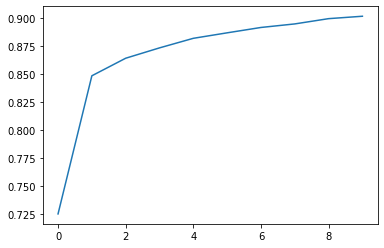

In [21]:
#plotting our accuracy
plt.plot(history.history['accuracy'])

In [22]:
#predicting the model
prediction = model.predict(x_test)

In [23]:
#rounding our output to the exact number
print(np.argmax(np.round(prediction[550])))

6


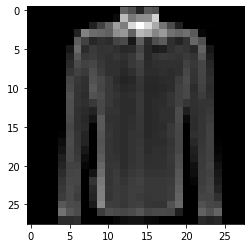

In [24]:
#plotting our test for verification
plt.imshow(x_test[550].reshape(28,28),cmap = 'gray')
plt.show()